# Task 1. MNIST Classification.

In this task we're gonna build 3 models for classification of handwritten digits from the famous MNIST dataset. The MNIST dataset consists of 60,000 training images and 10,000 test images. Our classes are the digits 0-9.
There are 3 algorithms we're gonna build:
1. Neural Network (Feedforward Neural Network)
2. Convolutional Neural Network (CNN).
3. Random Forest.

## Importing all needed packages and dependencies

In [1]:
import tensorflow as tf
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
from mnist_classifier import MnistClassifier

In [4]:
def load_mnist_dataset():
    (X_train, y_train), (X_test, y_test) = mnist.load_data()

    # Normalization process, the x values will be from 0 to 1
    X_train = (X_train / 255).astype(np.float32)
    X_test = (X_test / 255).astype(np.float32)

    y_train = y_train.astype(np.int64)
    y_test = y_test.astype(np.int64)

    return X_train, X_test, y_train, y_test

In [5]:
def evaluate_model(y_pred, y_true):
    accuracy = accuracy_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)

    class_report = classification_report(y_true, y_pred)

    return accuracy, cm, class_report

## Loading the dataset

In [6]:
X_train, X_test, y_train, y_test = load_mnist_dataset()

As we can notice, the values are between 0 and 1 - the result of the normalization

In [7]:
print(f"Max value in X_train: {X_train.max()}, min value: {X_train.min()}")

Max value in X_train: 1.0, min value: 0.0


In the dataset there are train values and 10000 test values. Moreover, the shape for x values is 28 * 28, which is a matrix. Each value represents a pixel. The value in the pixel varied from 0 to 255 (0 - black, 255 - white), now it's between 0 and 1

In [8]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (60000, 28, 28)
X_test shape: (10000, 28, 28)
y_train shape: (60000,)
y_test shape: (10000,)


Visualization of random 36 values

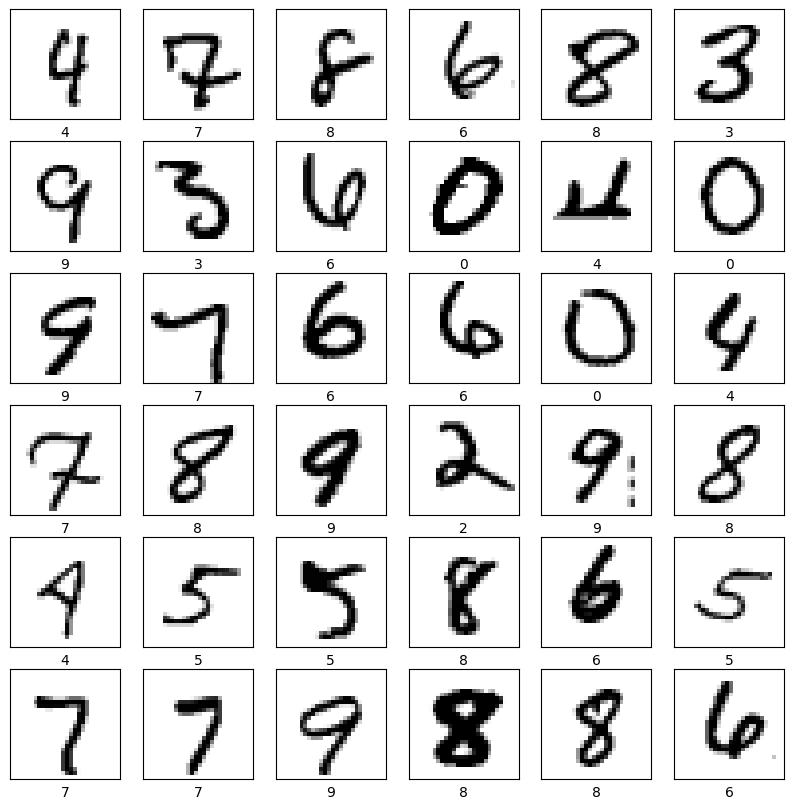

In [9]:
plt.figure(figsize=(10,10))
random_inds = np.random.choice(60000,36)
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]
    plt.imshow(np.squeeze(X_train[image_ind]), cmap=plt.cm.binary)
    plt.xlabel(y_train[image_ind])


## Neural Network (NN) Model 

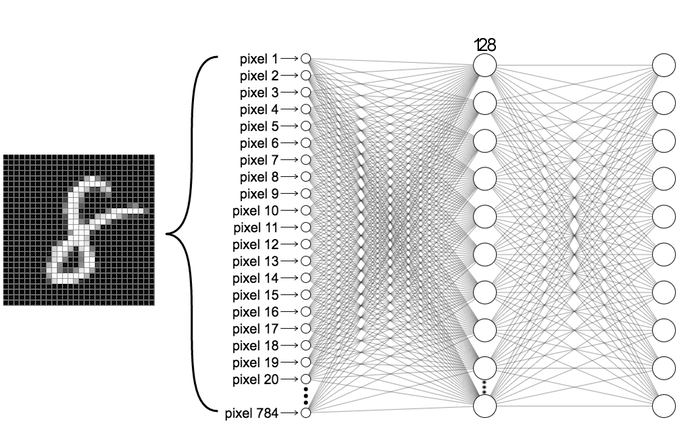

A simple feedforward neural network for MNIST classification.
The input layer has 784 neurons (28*28 pixels flattened to a vector).
Uses two dense layers. The first one has 128 neurons and ReLu activation function, which provides
non-linearity.
The second one has 10 neurons and Softmax function, which converts raw output, or
logits into probabilities. 10 neurons correspond to 10 classes (digits from 0 to 9).

Uses Adam optimizer with a learning rate of 0.001 and sparse categorical crossentropy as the loss function.
Adam (Adaptive Moment Estimation) is a popular optimization algorithm that is super powerful.

Sparse categorical crossentropy is used in multi-class classification, when the target labels
are integers (not one-hot encoded).
That's why while we're doing predictions, we use argmax to get the index of the highest probability
as the predicted class label.

Trains the model for 5 epochs with a batch size of 64.

In [10]:
nn_classifier = MnistClassifier(algorithm='nn')

In [11]:
nn_classifier.train(x_train = X_train, y_train = y_train)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9190 - loss: 0.2931
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9629 - loss: 0.1291
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9729 - loss: 0.0909
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9799 - loss: 0.0683
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9841 - loss: 0.0542


In [12]:
y_pred_nn = nn_classifier.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step


In [13]:
accuracy_nn, cm_nn, class_report_nn = evaluate_model(y_pred_nn, y_test)

In [14]:
print(f'Test accuracy for Neural Network (NN): {accuracy_nn}')

Test accuracy for Neural Network (NN): 0.9758


In [15]:
labels = range(0, 10)

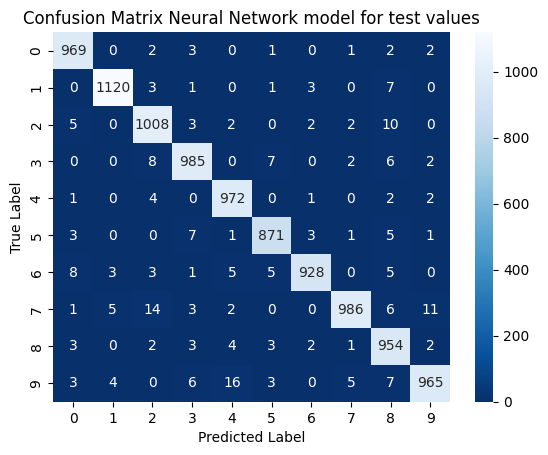

In [16]:
heatmap = sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Blues_r',
                      xticklabels=labels, yticklabels=labels)

plt.title('Confusion Matrix Neural Network model for test values')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [17]:
print('Classification Report for Neural Network: ', class_report_nn)

Classification Report for Neural Network:                precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.97      1032
           3       0.97      0.98      0.97      1010
           4       0.97      0.99      0.98       982
           5       0.98      0.98      0.98       892
           6       0.99      0.97      0.98       958
           7       0.99      0.96      0.97      1028
           8       0.95      0.98      0.96       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



## Convolutional Neural Network (CNN) Model

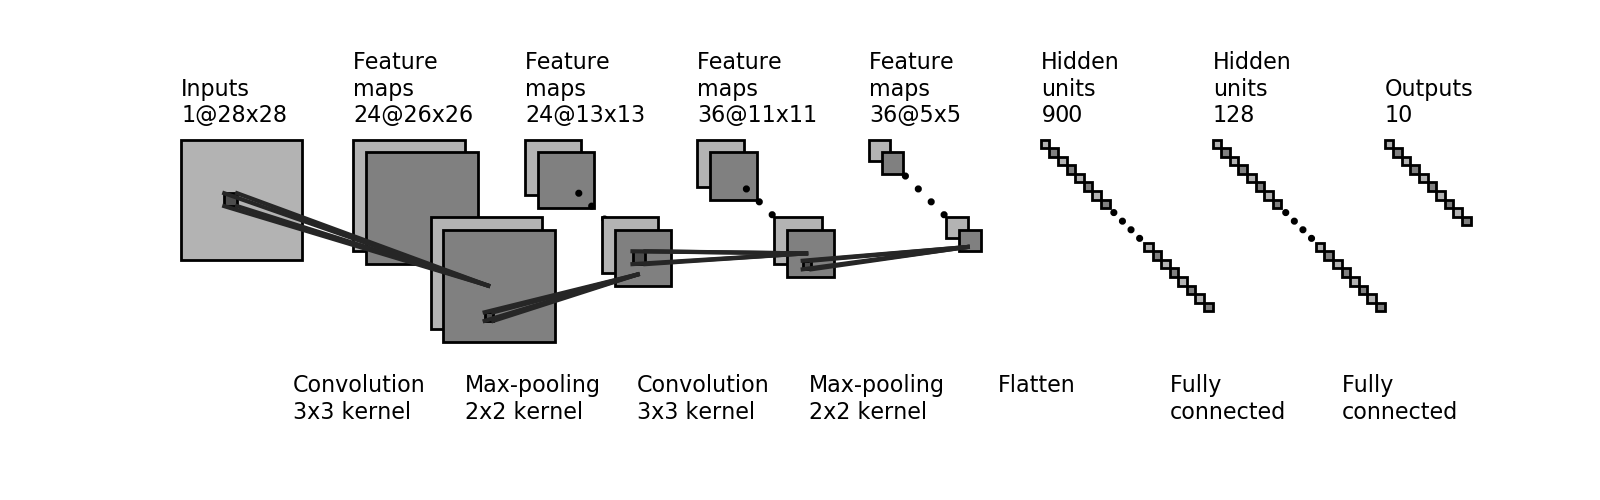

A Convolutional Neural Network (CNN) for MNIST classification.
The input layer has shape (28, 28, 1) - 28x28 pixels with 1 extra dimension -  color channel
(grayscale).
Uses two convolutional layers followed by max-pooling layers to reduce spatial dimensions.
The first convolutional layer has 24 filters, the second one has 36 filters.
Both use ReLu activation function, which provides non-linearity.
After the convolutional layers, the output is flattened and passed through a dense layer with
128 neurons and ReLu activation.
Finally, the output layer has 10 neurons with Softmax activation, which converts raw output, or
logits into probabilities. 10 neurons correspond to 10 classes (digits from 0 to 9).

Uses Adam optimizer with a learning rate of 0.001 and sparse categorical crossentropy as the loss function.
Adam (Adaptive Moment Estimation) is a popular optimization algorithm that is super powerful.
Sparse categorical crossentropy is used in multi-class classification, when the target labels
are integers (not one-hot encoded).
That's why while we're doing predictions, we use argmax to get the index of the highest probability
as the predicted class label.

Trains the model for 5 epochs with a batch size of 64.

In [18]:
cnn_classifier = MnistClassifier(algorithm='cnn')

In [19]:
cnn_classifier.train(x_train = X_train, y_train = y_train)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9480 - loss: 0.1750
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9832 - loss: 0.0537
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9886 - loss: 0.0373
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9910 - loss: 0.0288
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9928 - loss: 0.0226


In [20]:
y_pred_cnn = cnn_classifier.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [21]:
accuracy_cnn, cm_cnn, class_report_cnn = evaluate_model(y_pred_cnn, y_test)

In [22]:
print(f'Test accuracy for Convolutional Neural Network (CNN): {accuracy_cnn}')

Test accuracy for Convolutional Neural Network (CNN): 0.989


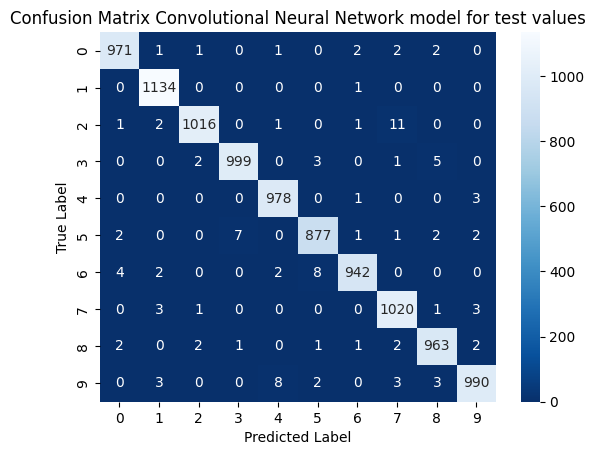

In [23]:
heatmap = sns.heatmap(cm_cnn, annot=True, fmt='d', cmap='Blues_r',
                      xticklabels=labels, yticklabels=labels)

plt.title('Confusion Matrix Convolutional Neural Network model for test values')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [24]:
print('Classification Report for Neural Network: ', class_report_cnn)

Classification Report for Neural Network:                precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.98      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.98      0.98      0.98       892
           6       0.99      0.98      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



## Random Forest Model

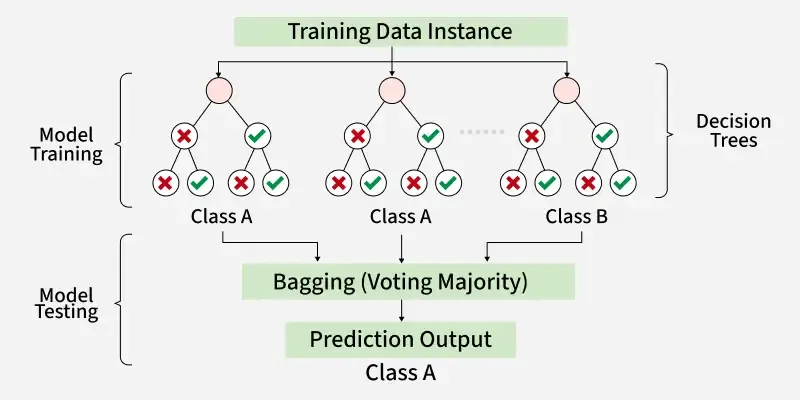

Random Forest Classifier for MNIST classification.
Uses 300 trees in the forest and a fixed random state for reproducibility (connected to
pseudo-random values).
While we're predicting, it directly returns the predicted class labels.

In [25]:
rf_classfier = MnistClassifier(algorithm='rf')

In [26]:
rf_classfier.train(X_train, y_train)

In [27]:
y_pred_rf = rf_classfier.predict(X_test)

In [28]:
accuracy_rf, cm_rf, class_report_rf = evaluate_model(y_pred_rf, y_test)

In [29]:
print(f'Test accuracy for Random Forest Model: {accuracy_rf}')

Test accuracy for Random Forest Model: 0.9715


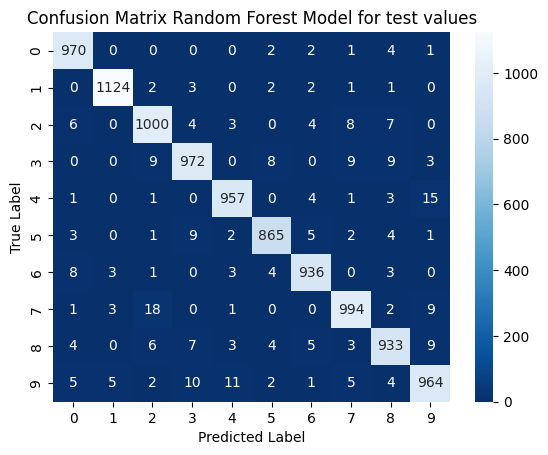

In [30]:
heatmap = sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues_r',
                      xticklabels=labels, yticklabels=labels)

plt.title('Confusion Matrix Random Forest Model for test values')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [31]:
print('Classification Report for Random Forest Model: ', class_report_cnn)

Classification Report for Random Forest Model:                precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.98      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.98      0.98      0.98       892
           6       0.99      0.98      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

